<a href="https://colab.research.google.com/github/Shruti-codes236/RL-DDPG-Tesk-Scheduling/blob/main/scheduling_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL simulating environment

1.   datacenters- 2 (2 hosts each- 2,4 and 4, 8); multiple hosts (multi-core) (quad, dual octa)
2.   multiple vms ( no. vms == processesing elements of host (like dual: 2 vms))
3.   cloudlets list (jobID and runtime)
4.   Reward : make span (Time taken to finish a task)
5.   Action: scheduling decision, container allocation based on optimising makeSpan


In [ ]:
import numpy as np
import math
import heapq

class datacenter:
    def __init__(self, datacenter, host1, host2):
        self.datacenter = datacenter
        # self.hostlist = hostlist
        self.host1 = host1
        self.host2 = host2 
        # self.num_hosts = len(hostlist)
        self.hosts = host1 + host2
        self.datacenters = ['D1','D2']
        self.environment = env

    def datacenterInstance(self):
      hostallot = {'H1' : 'D1', 'H2' : 'D1', 'H3' : 'D2', 'H4' : 'D2'}
      # print (hostallot)
      return (hostallot)


class Environment():
  def __init__(self, DC1, DC2, T):
      self.dc1_hosts = DC1
      self.dc2_hosts = DC2
      self.tasks = T
      self.state_dim = len(DC1)*3 + len(DC2)*3 + len(T)
      self.action_dim = len(DC1) + len(DC2)
      self.VMs = self.get_VMs(DC1, DC2)
      self.state = self.get_state()

  def get_VMs(self, DC1, DC2):
      VMs = []
      for h in DC1:
          for vm in DC1[h]:
              VMs.append({'host': h, 'name': vm, 'speed': DC1[h][vm]["MIPS"]})
      for h in DC2:
          for vm in DC2[h]:
              VMs.append({'host': h, 'name': vm, 'speed': DC2[h][vm]["MIPS"]})
      VMs = sorted(VMs, key=lambda vm: vm['speed'], reverse=True)
      print(VMs)
      return VMs

  def get_state(self):
      state = []
      for h in DC1:
          for vm in DC1[h]:
              state += [DC1[h][vm]["PE"], DC1[h]
                        [vm]["MIPS"], DC1[h][vm]["Storage"], 0]
              # VMs.append({'host': h, 'name': vm, 'speed': DC1[h][vm]["MIPS"]})
      for h in DC2:
          for vm in DC2[h]:
              state += [DC2[h][vm]["PE"], DC2[h]
                        [vm]["MIPS"], DC2[h][vm]["Storage"], 0]
      print(state)
      return state

  def step(self, action):
      # Allocate task to VM
      task_idx = int(action[0])
      host_idx = int(action[1])
      # print(task_idx, host_idx)
      task = self.tasks[task_idx]
      # print(len(self.dc1_hosts))
      if host_idx < len(self.dc1_hosts):
          hostlist = list(self.dc1_hosts.keys())
          host = hostlist[host_idx % len(self.dc1_hosts)]
          # print(host)
          print(self.dc1_hosts[host])
          for vm in self.dc1_hosts[host]:
            # print(vm)
            # print( vm['MIPS'])
            if self.dc1_hosts[host][vm]['MIPS'] >= task:
              # host["Allocate_task"]=task

              if task in self.tasks:
                self.tasks.remove(task)
              reward = task / self.dc1_hosts[host][vm]['MIPS']
            else:
              reward = -1.0
      else:
          host_dx = host_idx % len(self.dc2_hosts)
          hostlist = list(self.dc2_hosts.keys())
          print(host_idx)
          host = hostlist[(len(self.dc1_hosts) - host_idx) %
                          len(self.dc2_hosts)]
          print(self.dc2_hosts[host])
          for vm in self.dc2_hosts[host]:
            print(vm)
            if self.dc2_hosts[host][vm]['MIPS'] >= task:
              if task in self.tasks:
                self.tasks.remove(task)
              reward = task / self.dc2_hosts[host][vm]['MIPS']
            else:
              reward = -1.0

      done = len(self.tasks) == 0
      self.state = self.get_state()
      return self.state, reward, done, {}

  def reset(self):
      """
      Reset the environment to execute a new episode.
      Returns: State representing the initial position of the agent.
      """
      return self.state
    
class Containers():   #to define vms

    def __init__(self, host, pe):
      self.host = host
      self.pe = pe
      # self.vmlist

    def createContainers(self): #Allocate Containers based on the processing elements of the Host
      vmlist = []
      for i in range(self.pe):
        vmlist.append(input("Enter VmID : "))
      print(self.host, end='')
      print(vmlist)
      return vmlist

class cloudlet():

  def __init__(self, JobID, Runtime):
    self.JobID = JobID
    self.Runtime = Runtime

  def createCloudlet(self):       #Creating Tasklist
    cloudletlist = []
    for i in range(5):
      cloudletlist.append(np.random.randint(0,10))
    return cloudletlist
    
#Waiting queue implementation
class PriorityQueue:

    def __init__(self):
        self.heap = []

    def add_task(self, task):
        heapq.heappush(self.heap, task)

    def get_next_task(self):
        if not self.heap:
            return None
        return heapq.heappop(self.heap)

    def is_empty(self):
        return len(self.heap) == 0

# Define hosts and VMs in Datacenters
# PE = Processing Elements, RAM int GBs, Storage in GBs
DC1 = {'H1': {
          'VM1': {"PE" : 2, "MIPS" : 100, "Storage" : 100}, 
          'VM2': {"PE" : 4, "MIPS" : 200, "Storage" : 200} 
        },
       'H2': {
          'VM1': {"PE" : 2, "MIPS" : 250, "Storage" : 100}, 
          'VM2': {"PE" : 4, "MIPS" : 100, "Storage" : 200}, 
          'VM3': {"PE" : 2, "MIPS" : 230, "Storage" : 250}, 
          'VM4': {"PE" : 4, "MIPS" : 250, "Storage" : 280} 
        }    
      }
DC2 = {'H3': {
          'VM1': {"PE" : 2, "MIPS" : 400, "Storage" : 100}, 
          'VM2': {"PE" : 4, "MIPS" : 240, "Storage" : 200}, 
          'VM3': {"PE" : 2, "MIPS" : 200, "Storage" : 250}, 
          'VM4': {"PE" : 4, "MIPS" : 150, "Storage" : 280} 
        },    
       'H4': {
          'VM1': {"PE" : 2, "MIPS" : 150, "Storage" : 100}, 
          'VM2': {"PE" : 4, "MIPS" : 250, "Storage" : 200}, 
          'VM3': {"PE" : 2, "MIPS" : 230, "Storage" : 250}, 
          'VM4': {"PE" : 4, "MIPS" : 300, "Storage" : 280}, 
          'VM5': {"PE" : 2, "MIPS" : 140, "Storage" : 100}, 
          'VM6': {"PE" : 4, "MIPS" : 200, "Storage" : 200}, 
          'VM7': {"PE" : 2, "MIPS" : 100, "Storage" : 250}, 
          'VM8': {"PE" : 4, "MIPS" : 300, "Storage" : 280} 
        }    
      }

# Define tasks
T = {'t1': 5000, 't2': 7500, 't3': 10000, 't4': 12500, 't5': 15000, 't6': 22500, 't7': 15000, 't8': 1000,  't9': 20000, 't10': 15000,
    't11': 30500, 't12': 32000, 't13': 10500, 't14': 15000, 't15': 10300, 't16': 20100, 't17': 251000, 't18': 32100, 't19': 27100, 't20': 21000,
     't21': 350000, 't22': 169000, 't23': 26900, 't24': 12345, 't25': 10069, 't26': 102938, 't27': 10690, 't28':12000, 't29': 14005, 't30': 15005,
     't31': 2000, 't32': 3200, 't33': 348245, 't34': 472835, 't35': 42355, 't36': 69000, 't37': 12345, 't38': 34500, 't39': 45000, 't40': 55000}

# Sort tasks according to their length in ascending order
T = dict(sorted(T.items(), key=lambda item: item[1]))

# Sort VMs according to their speed in descending order
VMs = []
for h in DC1:
    for vm in DC1[h]:
        VMs.append({'host': h, 'name': vm, 'speed': DC1[h][vm]['MIPS']})
for h in DC2:
    for vm in DC2[h]:
        VMs.append({'host': h, 'name': vm, 'speed': DC2[h][vm]['MIPS']})
VMs = sorted(VMs, key=lambda vm: vm['speed'], reverse=True)

# print(VMs)
print("Total VMs :", len(VMs))

# Compute capacity of each VM
for vm in VMs:
    vm['capacity'] = math.floor((vm['speed'] * 1000) / 2)

#Add attribute for Availability of VM
for vm in VMs:
    vm['Availability'] = True

print(VMs)

# Initialize start and finish time of each task to 0
for task in T:
    T[task] = {'length': T[task], 'start_time': 0, 'finish_time': 0}

for vm in VMs:
    vm['start_time']=0
    vm['finish_time']=0

prev_task='t1'
vm_allocated = [False] * len(VMs)
all_allocated= False
queue =['t1']
count_of_tasks = len(T)
print("count of tasks : ", count_of_tasks)


for task in T:
        T[task]['allocated']=False

# Allocate tasks to VMs
while(len(queue)>0):
    for task in T:
        
        for vm in VMs:
              if T[task]['length'] <= vm['capacity'] and vm['Availability']==True and T[task]['allocated']==False:
                  T[task]['start_time'] = vm['finish_time']
                  print(task, T[task]['start_time'])
                  T[task]['VM'] = vm
                  T[task]['finish_time'] = T[task]['start_time'] + math.ceil((T[task]['length'] * 1000) / vm['speed'])
                  vm['start_time']=T[task]['start_time']
                  vm['finish_time']=T[task]['finish_time']
                  T[task]['allocated']=True
                  vm['Availability']=False
                  count_of_tasks-=1
                  prev_task = task
                  print(T[task])
                  break
        if not T[task]['allocated']:
            queue.append(task)
            
    for vm in VMs:
      vm['Availability'] = True  
    while(len(queue)):
      task = queue.pop(0)
      print(T[task])
      for vm in VMs:
        if T[task]['length'] <= vm['capacity'] and vm['Availability']==True and T[task]['allocated']==False:
          T[task]['start_time'] = vm['finish_time'] 
          T[task]['VM'] = vm
          T[task]['finish_time'] = T[task]['start_time'] + math.ceil((T[task]['length'] * 1000) / vm['speed'])
          vm['finish_time']=T[task]['finish_time']
          vm['Availability']=False
          count_of_tasks-=1
          T[task]['allocated']=True
          break
      
# Some tasks could not be allocated due to high computation capacity required

last_task = 0
print("Tasks    Start Time     Finish Time      VM  ")

for task in T:
  if T[task]['allocated'] :
    print(task, T[task]['length'], "     ", T[task]['start_time'], "     ", T[task]['finish_time'], "    ", T[task]['VM'])
    last_task = max(last_task,T[task]['finish_time'])

makespan = last_task
print("Total Makespan = ", last_task)



Total VMs : 18
[{'host': 'H3', 'name': 'VM1', 'speed': 400, 'capacity': 200000, 'Availability': True}, {'host': 'H4', 'name': 'VM4', 'speed': 300, 'capacity': 150000, 'Availability': True}, {'host': 'H4', 'name': 'VM8', 'speed': 300, 'capacity': 150000, 'Availability': True}, {'host': 'H2', 'name': 'VM1', 'speed': 250, 'capacity': 125000, 'Availability': True}, {'host': 'H2', 'name': 'VM4', 'speed': 250, 'capacity': 125000, 'Availability': True}, {'host': 'H4', 'name': 'VM2', 'speed': 250, 'capacity': 125000, 'Availability': True}, {'host': 'H3', 'name': 'VM2', 'speed': 240, 'capacity': 120000, 'Availability': True}, {'host': 'H2', 'name': 'VM3', 'speed': 230, 'capacity': 115000, 'Availability': True}, {'host': 'H4', 'name': 'VM3', 'speed': 230, 'capacity': 115000, 'Availability': True}, {'host': 'H1', 'name': 'VM2', 'speed': 200, 'capacity': 100000, 'Availability': True}, {'host': 'H3', 'name': 'VM3', 'speed': 200, 'capacity': 100000, 'Availability': True}, {'host': 'H4', 'name': 'VM6

['t8', 't31', 't32', 't1', 't2', 't3', 't25', 't15', 't13', 't27', 't28', 't24', 't37', 't4', 't29', 't5', 't7', 't10', 't14', 't30', 't9', 't16', 't20', 't6', 't23', 't19', 't11', 't12', 't18', 't38', 't35', 't39', 't40']
['H3 VM1', 'H4 VM4', 'H4 VM8', 'H2 VM1', 'H2 VM4', 'H4 VM2', 'H3 VM2', 'H2 VM3', 'H4 VM3', 'H1 VM2', 'H3 VM3', 'H4 VM6', 'H3 VM4', 'H4 VM1', 'H4 VM5', 'H1 VM1', 'H2 VM2', 'H4 VM7', 'H3 VM1', 'H4 VM4', 'H4 VM8', 'H2 VM1', 'H2 VM4', 'H4 VM2', 'H3 VM2', 'H2 VM3', 'H4 VM3', 'H1 VM2', 'H3 VM3', 'H4 VM6', 'H3 VM4', 'H4 VM1', 'H4 VM5']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2500, 6667, 10667, 20000, 30000, 40000, 41955, 44783, 45653, 53450, 60000, 61725, 82300, 83334, 100036]
[2500, 6667, 10667, 20000, 30000, 40000, 41955, 44783, 45653, 53450, 60000, 61725, 82300, 83334, 100036, 150000, 150000, 150000, 40000, 56684, 77334, 100400, 114000, 130000, 154039, 162610, 178262, 213450, 220500, 234225, 364667, 383334, 492894]
   tasks     VMs  start_time  end_time   

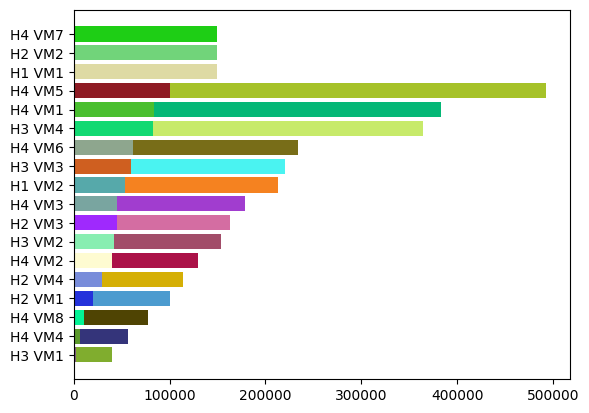

In [ ]:
#To print Graphs

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import random

tasks=[]
VM=[]
start_time=[]
end_time=[]

for task in T:
  if T[task]['allocated']:
    tasks.append(task)
    VM.append(T[task]['VM']['host'] + ' ' + T[task]['VM']['name'])
    start_time.append(T[task]['start_time'])
    end_time.append(T[task]['finish_time'])
    
print(tasks)
print(VM)
print(start_time)
print(end_time)
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(len(tasks))]

df = pd.DataFrame(data={"tasks": tasks, "VMs" : VM, "start_time" : start_time, "end_time": end_time, "Color": colors})

print(df)

df['seconds_to_start'] = (df['start_time'] - df['start_time'].min())

df['seconds_to_end'] = (df['end_time'] - df['start_time'].min())

df['task_duration'] = df['seconds_to_end'] - df['seconds_to_start'] + 1  # to include also the end date

# df['completion_days'] = df['completion_frac'] * df['task_duration']

print(df)
plt.barh(y=df['VMs'], width=df['task_duration'], left=df['seconds_to_start'], color=df["Color"])
plt.show()

['t8', 't31', 't32', 't1', 't2', 't3', 't25', 't15', 't13', 't27', 't28', 't24', 't37', 't4', 't29', 't5', 't7', 't10', 't14', 't30', 't9', 't16', 't20', 't6', 't23', 't19', 't11', 't12', 't18', 't38', 't35', 't39', 't40']
['H3 VM1', 'H4 VM4', 'H4 VM8', 'H2 VM1', 'H2 VM4', 'H4 VM2', 'H3 VM2', 'H2 VM3', 'H4 VM3', 'H1 VM2', 'H3 VM3', 'H4 VM6', 'H3 VM4', 'H4 VM1', 'H4 VM5', 'H1 VM1', 'H2 VM2', 'H4 VM7', 'H3 VM1', 'H4 VM4', 'H4 VM8', 'H2 VM1', 'H2 VM4', 'H4 VM2', 'H3 VM2', 'H2 VM3', 'H4 VM3', 'H1 VM2', 'H3 VM3', 'H4 VM6', 'H3 VM4', 'H4 VM1', 'H4 VM5']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2500, 6667, 10667, 20000, 30000, 40000, 41955, 44783, 45653, 53450, 60000, 61725, 82300, 83334, 100036]
[2500, 6667, 10667, 20000, 30000, 40000, 41955, 44783, 45653, 53450, 60000, 61725, 82300, 83334, 100036, 150000, 150000, 150000, 40000, 56684, 77334, 100400, 114000, 130000, 154039, 162610, 178262, 213450, 220500, 234225, 364667, 383334, 492894]
   tasks     VMs  start_time  end_time   

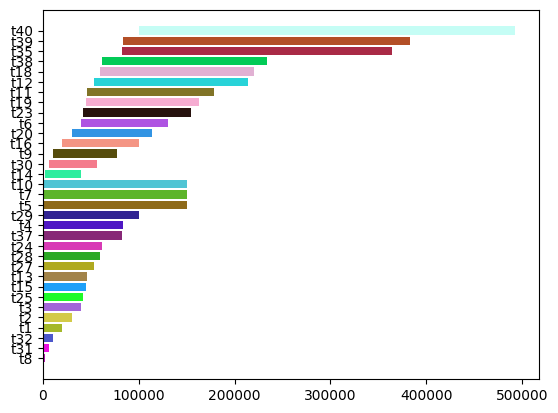

In [ ]:
#To print Graphs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import random

tasks=[]
VM=[]
start_time=[]
end_time=[]
for task in T:
  if T[task]['allocated']:
    tasks.append(task)
    VM.append(T[task]['VM']['host'] + ' ' + T[task]['VM']['name'])
    start_time.append(T[task]['start_time'])
    end_time.append(T[task]['finish_time'])
    
print(tasks)
print(VM)
print(start_time)
print(end_time)
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(len(tasks))]

df = pd.DataFrame(data={"tasks": tasks, "VMs" : VM, "start_time" : start_time, "end_time": end_time, "Color": colors})

print(df)

df['seconds_to_start'] = (df['start_time'] - df['start_time'].min())

df['seconds_to_end'] = (df['end_time'] - df['start_time'].min())

df['task_duration'] = df['seconds_to_end'] - df['seconds_to_start'] + 1  # to include also the end date

# df['completion_days'] = df['completion_frac'] * df['task_duration']

print(df)
plt.barh(y=df['tasks'], width=df['task_duration'], left=df['seconds_to_start'], color=df["Color"])
plt.show()

# Deep Deterministic Policy Gradient Method

In [ ]:
#DDPG 
!pip install torch==1.13.1 --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1+cpu which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.1+cpu which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.1+cpu which is incompatible.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1+cpu which is incompatible.


In [ ]:
!pip install numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
import gym
from gym import spaces

# Task Scheduling Environement

The shape of action space is MultiDiscrete([no_of_vms, no_of_tasks]).

In [ ]:
class VMAllocationEnv:

    def __init__(self, no_of_tasks, no_of_vms, task_lengths):
        super().__init__()
        self.task_lengths = task_lengths
        self.no_of_tasks = no_of_tasks
        self.no_of_vms = no_of_vms
        self.observation_space = spaces.Box(low=0, high=1, shape=(no_of_vms, no_of_tasks), dtype=np.float32)
        self.action_space = spaces.MultiDiscrete([no_of_vms, no_of_tasks])
        self.state = np.zeros((no_of_vms, no_of_tasks), dtype = int)

    def calculate_reward(self, state, action, task_lengths):
        next_state = self.get_next_state(state, action)
        makespan = self.calculate_makespan(next_state, task_lengths)
        return 1.0/float(makespan)

    def get_next_state(self, state, action):
        vm_idx = action[0]
        task_idx = action[1]
        next_state = state
        for i in range(len(next_state)):
            if (next_state[i][task_idx] == 1):
                next_state[i][task_idx] = 0
            next_state[vm_idx][task_idx] = 1
        return next_state

    def calculate_makespan(self, state, task_lengths):
        makespan = 0.0
        for i in range(len(state)):
            time_in_row = 0.0
            for j in range(len(state[0])):
                if (state[i][j] == 1):
                    time_in_row += task_lengths[j]
            makespan = max(makespan, time_in_row)
        # print("Makespan in env : ", makespan)
        return makespan

    def are_all_assigned(self, state): #true if f==no_of_tasks
        f = 0
        for i in range(len(state[0])):
            for j in range(len(state)):
                if (state[j][i] == 1):
                    f += 1
        if (f == self.no_of_tasks):
                # print("All are assigned!")
                return True
        return False
    
    def step(self, action):
        reward = self.calculate_reward(self.state, action, self.task_lengths)
        self.state = self.get_next_state(self.state, action)
        done = self.are_all_assigned(self.state)
        truncated = False
        info = {}
        # print("Step Called!")
        return self.state, reward, done, info

    def reset(self):
        self.state = np.zeros((self.no_of_vms, self.no_of_tasks), dtype = int)
#       self.state = self.state.flatten()
        # print(self.state)
        return self.state


task_lengths=[10, 20, 30, 40, 50, 60]
no_of_vms = 4
no_of_tasks = len(task_lengths)
env = VMAllocationEnv(no_of_tasks, no_of_vms, task_lengths)


# Q Learning

Bellman Equation: 
𝑄∗(𝑠𝑡,𝑎𝑡)=𝑟𝑡+𝛾max𝑎𝑄(𝑠𝑡+1,𝑎)(1)
 
where 𝑄∗
 means the optimal 𝑄
 value.

Now we consider Q-network 𝑄𝜙
 where 𝜙
 is parameters.
To optimize the equation (1), we should find 𝜙
 to minimize the following loss 𝐿
 for tuples (𝑠𝑡,𝑎𝑡,𝑟𝑡,𝑠𝑡+1,𝑑𝑡)
.

𝐿=𝐸[(𝑄𝜙(𝑠𝑡,𝑎𝑡)−(𝑟𝑡+𝛾(1−𝑑𝑡)max𝑎𝑄𝜙(𝑠𝑡+1,𝑎)))2](2)
where 𝑑𝑡=1
 if the episode is done, and 0
 otherwise.

To make the above maximization,  max𝑎𝑄𝜙(𝑠𝑡+1,𝑎)
 work in continuous action space, we introduce the action policy 𝜇𝜃(𝑠)
, with which we'll find 𝜃
 to maximize 𝑄𝜙(𝑠,𝜇𝜃(𝑠))
.
The equation (2) will then be written as follows.

𝐿=𝐸[(𝑄𝜙(𝑠𝑡,𝑎𝑡)−(𝑟𝑡+𝛾(1−𝑑𝑡)𝑄𝜙(𝑠𝑡+1,𝜇𝜃(𝑠𝑡+1))))2](3)

To make the minimization (3) stable, we also introduce the separated parameters  𝜙′
  and  𝜃′
  (called target) as follows.

𝐿=𝐸[(𝑄𝜙(𝑠𝑡,𝑎𝑡)−(𝑟𝑡+𝛾(1−𝑑𝑡)𝑄𝜙′(𝑠𝑡+1,𝜇𝜃′(𝑠𝑡+1))))2](4)
 
And these parameters are delayed with coefficient parameter (hyper-parameter)  𝜏
  (which is near 0) after each training.

𝜙′=𝜏𝜙+(1−𝜏)𝜙′
 
𝜃′=𝜏𝜃+(1−𝜏)𝜃′
 
To summarize algorithm :


*   Collect tuples  (𝑠𝑡,𝑎𝑡,𝑟𝑡,𝑠𝑡+1,𝑑𝑡)
*   Optimize  𝜙
  to minimize  𝐿
  in (4)
*   Optimize  𝜃
  to maximize   𝑄𝜙(𝑠,𝜇𝜃(𝑠))
*   Update target parameters as follows
    * 𝜙′=𝜏𝜙+(1−𝜏)𝜙′
    * 𝜃′=𝜏𝜃+(1−𝜏)𝜃′


# 1. Q-network

Build Q-network (both  𝑄𝜙(𝑠,𝑎)
  and  𝑄𝜙′(𝑠,𝑎)
 )


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class QNet(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()

        self.hidden = nn.Linear(no_of_vms*no_of_tasks+2, hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)

    def forward(self, s, a):
#         print("QNetwork outs: s: ",s," a : ",  a)
        a = np.squeeze(a)
        s = np.squeeze(s)
        outs = torch.concat((torch.flatten(s[0]),a[0]), dim=-1)
        for t in range(1,len(s)):
            x = torch.flatten(s[t])
            output=torch.concat((x, a[t]), dim=-1)
            outs=torch.concat((outs,output), dim=-1)
        outs = torch.reshape(outs,(len(s), 1, (no_of_vms*no_of_tasks)+len(a[0])))
        outs = self.hidden(outs)
        outs = F.relu(outs)
        outs = self.output(outs)
        return outs

q_origin_model = QNet().to(device)  # Q_phi
q_target_model = QNet().to(device)  # Q_phi'
_ = q_target_model.requires_grad_(False)  # target model doen't need grad

# 2. Policy Network

build policy network (both  𝜇𝜃(𝑠)
  and  𝜇𝜃′(𝑠)
 ) as follows. The action_space is activated using tanh()

In [ ]:
class PolicyNet(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()

        self.hidden = nn.Linear((no_of_vms*no_of_tasks), hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)

    def forward(self, s):
        outs = torch.flatten(s[0])
        for t in range(1,len(s)):
            x = torch.flatten(s[t])
#             output=torch.concat((x, a[t]), dim=-1)
            outs=torch.concat((outs,x), dim=-1)
        outs.resize_([len(s),(no_of_vms*no_of_tasks)])
        s = outs
        outs = self.hidden(s)
        outs = F.relu(outs)
        outs = self.output(outs)
        outs = torch.tanh(outs)
        return outs

mu_origin_model = PolicyNet().to(device)  # mu_theta
mu_target_model = PolicyNet().to(device)  # mu_theta'
_ = mu_target_model.requires_grad_(False)  # target model doen't need grad

# Function to optimize network parameters 𝜙,𝜃

As I have mentioned above, we optimize parameters as follows :

* Optimize  𝜙
  to minimize  𝐿
  in (4)
* Optimize  𝜃
  to maximize  𝑄𝜙(𝑠,𝜇𝜃(𝑠))

In [ ]:
gamma = 0.80 #0.99
opt_q = torch.optim.AdamW(q_origin_model.parameters(), lr=0.05)
opt_mu = torch.optim.AdamW(mu_origin_model.parameters(), lr=0.05)

def optimize(states, actions, rewards, next_states, dones):
    # Convert to tensor
#     print("states : ", states)
#     print("actions : ", actions)
    states = torch.tensor(states, dtype=torch.float).to(device)
    actions = torch.tensor(actions, dtype=torch.float).to(device)
    actions = actions.unsqueeze(dim=1)
    rewards = torch.tensor(rewards, dtype=torch.float).to(device)
    rewards = rewards.unsqueeze(dim=1)
    next_states = torch.tensor(next_states, dtype=torch.float).to(device)
    dones = torch.tensor(dones, dtype=torch.float).to(device)
    dones = dones.unsqueeze(dim=1)

    # Optimize critic loss
    opt_q.zero_grad()
    q_org = q_origin_model(states, actions)
    mu_tgt_next = mu_target_model(next_states)
    q_tgt_next = q_target_model(next_states, mu_tgt_next)
    q_tgt = rewards + gamma * (1.0 - dones) * q_tgt_next
    loss_q = F.mse_loss(
        q_org,
        q_tgt,
        reduction="none")
    loss_q.sum().backward()
    opt_q.step()

    # Optimize actor loss
    opt_mu.zero_grad()
    mu_org = mu_origin_model(states)
    for p in q_origin_model.parameters():
        p.requires_grad = False # disable grad in q_origin_model before computation
    q_tgt_max = q_origin_model(states, mu_org)
    (-q_tgt_max).sum().backward()
    opt_mu.step()
    for p in q_origin_model.parameters():
        p.requires_grad = True # enable grad again

# 4. Function to update target parameters  𝜙′,𝜃′
 
Target parameters are updated as follows.

* 𝜙′=𝜏𝜙+(1−𝜏)𝜙′
 
* 𝜃′=𝜏𝜃+(1−𝜏)𝜃′

In [ ]:
tau = 0.001 #0.002

def update_target():
    for var, var_target in zip(q_origin_model.parameters(), q_target_model.parameters()):
        var_target.data = tau * var.data + (1.0 - tau) * var_target.data
    for var, var_target in zip(mu_origin_model.parameters(), mu_target_model.parameters()):
        var_target.data = tau * var.data + (1.0 - tau) * var_target.data

# 5. Replay Buffer
To prevent from learning only for recent experiences in DDPG, we store the past experience of tuples  (𝑠𝑡,𝑎𝑡,𝑟𝑡,𝑠𝑡+1,𝑑𝑡)
  in buffer (called "replay buffer") and pick up the randomized samples in batch training.

In [ ]:
class replayBuffer:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
        self.buffer = []
        self._next_idx = 0

    def add(self, item):
        if len(self.buffer) > self._next_idx:
            self.buffer[self._next_idx] = item
        else:
            self.buffer.append(item)
        if self._next_idx == self.buffer_size - 1:
            self._next_idx = 0
        else:
            self._next_idx = self._next_idx + 1
#         print("Item_to_be_added : ",item)
#         print("Buffer", self.buffer)

    def sample(self, batch_size):
        indices = [random.randint(0, len(self.buffer) - 1) for _ in range(batch_size)]
        states   = [self.buffer[i][0] for i in indices]
        actions  = [self.buffer[i][1] for i in indices]
        rewards  = [self.buffer[i][2] for i in indices]
        n_states = [self.buffer[i][3] for i in indices]
        dones    = [self.buffer[i][4] for i in indices]
#         print("Buffer :", [states, actions, rewards, n_states, dones] )
        return states, actions, rewards, n_states, dones

    def length(self):
        return len(self.buffer)

buffer = replayBuffer(buffer_size=2000)

# Driver code and fetching results

In [ ]:
batch_size = 250 #250

reward_records = []
episodes = []
final_makespan = []
for i in range(100):   #2000
    # Run episode till done
    s = env.reset()
    # print("S : ",s)
    done = False
    cum_reward = 0
    makespans =[]
    while not done:
        # a = pick_sample(s)
#         print("a : ",a)
        a = env.action_space.sample()
        # print("Sample Action: ", a)
        s_next, r, done, _ = env.step(a)
#         print("action : ", a)
        buffer.add([s, a, r, s_next, float(done)])
        if done:
          makespans.append(1/r)
          cum_reward += r
        # Train (optimize parameters)
        if buffer.length() >= batch_size:
            states, actions, rewards, n_states, dones = buffer.sample(batch_size)
            # print("States :", states )
            # print("actions :", actions )
            # print("rewards :", rewards )
            # print("n_states :", n_states )
            # print("dones :", dones)
            optimize(states, actions, rewards, n_states, dones)
            update_target()
        s = s_next

    # Output total rewards in episode (max 500)
    episodes.append(i)
    # print("Episode :", i)
    print("Run episode ",i, " with rewards ", cum_reward)
    # print("Makespan :", np.average(makespans))
    reward_records.append(cum_reward)
    final_makespan.append(min(makespans))
    # stop if reward mean > 100.0
    if np.average(reward_records[-50:]) > 100.0:
        break
print("Final Makespan : ", min(final_makespan))
print("\nDone")

Run episode  0  with rewards  0.00909090909090909
Run episode  1  with rewards  0.0125
Run episode  2  with rewards  0.011111111111111112
Run episode  3  with rewards  0.007142857142857143
Run episode  4  with rewards  0.0125
Run episode  5  with rewards  0.00909090909090909
Run episode  6  with rewards  0.0125
Run episode  7  with rewards  0.01
Run episode  8  with rewards  0.006666666666666667
Run episode  9  with rewards  0.01
Run episode  10  with rewards  0.007142857142857143
Run episode  11  with rewards  0.0125
Run episode  12  with rewards  0.00909090909090909
Run episode  13  with rewards  0.007142857142857143
Run episode  14  with rewards  0.006666666666666667
Run episode  15  with rewards  0.00909090909090909
Run episode  16  with rewards  0.011111111111111112
Run episode  17  with rewards  0.00909090909090909
Run episode  18  with rewards  0.0125
Run episode  19  with rewards  0.00909090909090909


<ipython-input-10-6c00514f5645>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  states = torch.tensor(states, dtype=torch.float).to(device)
<ipython-input-10-6c00514f5645>:24: UserWarning: Using a target size (torch.Size([250, 250, 2])) that is different to the input size (torch.Size([250, 1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_q = F.mse_loss(


Run episode  20  with rewards  0.01
Run episode  21  with rewards  0.006666666666666667
Run episode  22  with rewards  0.01
Run episode  23  with rewards  0.014285714285714285
Run episode  24  with rewards  0.0125
Run episode  25  with rewards  0.0125
Run episode  26  with rewards  0.011111111111111112
Run episode  27  with rewards  0.00909090909090909
Run episode  28  with rewards  0.011111111111111112
Run episode  29  with rewards  0.00909090909090909
Run episode  30  with rewards  0.00625
Run episode  31  with rewards  0.01
Run episode  32  with rewards  0.011111111111111112
Run episode  33  with rewards  0.011111111111111112
Run episode  34  with rewards  0.011111111111111112
Run episode  35  with rewards  0.0125
Run episode  36  with rewards  0.011111111111111112
Run episode  37  with rewards  0.00909090909090909
Run episode  38  with rewards  0.011111111111111112
Run episode  39  with rewards  0.0125
Run episode  40  with rewards  0.011111111111111112
Run episode  41  with reward

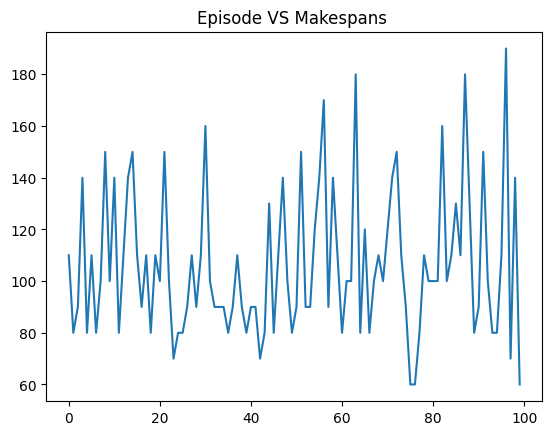

In [ ]:
#To print Graphs

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import random

# X axis parameter:
xaxis = episodes

# Y axis parameter:
yaxis = final_makespan

plt.plot(xaxis, yaxis)
plt.title("Episode VS Makespans ")
plt.show()

99.61848643909168


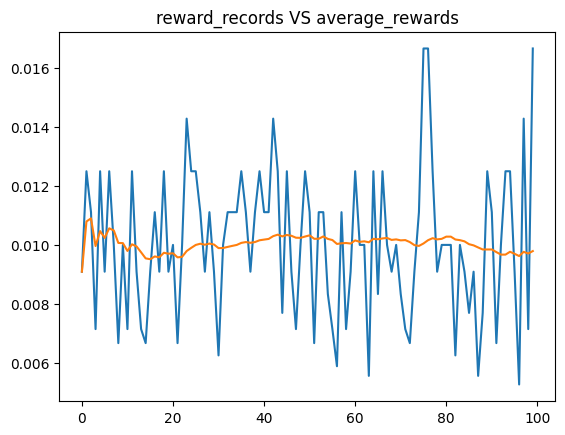

In [ ]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))

plt.title("reward_records VS average_rewards")
plt.plot(reward_records)
plt.plot(average_reward)
avg_reward=sum(average_reward)/len(average_reward)
print(1/avg_reward)